In [1]:
!pip install -q linearmodels

     |████████████████████████████████| 1.4MB 2.9MB/s 


In [0]:
from linearmodels.datasets import wage_panel
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# Exploring data
Dahlberg and Johansson Municipal Expenditure Data, 265 Swedish Municipalities, 9 years
Variables in the file are:
- ID = Identification, 1,..., 265
- YEAR = year, 1979,...,1987
- REVENUE = Receipts, taxes and Fees
- GRANTS = Government grants and shared tax revenues

Target:
- EXPEND = Expenditures

See Greene (2003, pp. 551 and elsewhere) for analysis of these data. The article on which the analysis is based is Dahlberg, M. and E. Johannson, E., "An Examination of the Dynamic Behavior of Local Governments using GMM Bootstrapping Methods," Journal of Applied Econometrics, 15, 2000, pp. 401-416.  (These data were downloaded from the JAE data archive.)


In [0]:
data = pd.read_csv('/content/drive/My Drive/dahlberg.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 5 columns):
ID         2385 non-null int64
YEAR       2385 non-null int64
EXPEND     2385 non-null float64
REVENUE    2385 non-null float64
GRANTS     2385 non-null float64
dtypes: float64(3), int64(2)
memory usage: 93.3 KB


In [7]:
data.describe()

,ID,YEAR,EXPEND,REVENUE,GRANTS
count,2385.000000,2385.00000,2385.000000,2385.000000,2385.000000
mean,1424.777358,1983.00000,0.018479,0.013423,0.005236
std,695.012999,2.58253,0.003174,0.003004,0.001261
min,114.000000,1979.00000,0.012226,0.006228,0.001571
25%,860.000000,1981.00000,0.016222,0.011339,0.004488
50%,1507.000000,1983.00000,0.017963,0.012952,0.004978
75%,1981.000000,1985.00000,0.020145,0.014821,0.005539
max,2584.000000,1987.00000,0.033883,0.029142,0.012589


In [8]:
data.ID.unique()

array([ 114,  115,  120,  123,  125,  126,  136,  138,  139,  160,  162,
        163,  180,  181,  182,  183,  184,  186,  188,  191,  192,  305,
        319,  360,  380,  381,  382,  428,  481,  482,  483,  484,  486,
        509,  512,  513,  560,  561,  562,  563,  580,  581,  582,  586,
        604,  617,  662,  665,  680,  682,  683,  684,  685,  686,  687,
        760,  761,  763,  764,  765,  767,  780,  781,  821,  834,  840,
        860,  861,  862,  880,  881,  882,  883,  884,  885, 1060, 1080,
       1081, 1082, 1083, 1121, 1137, 1160, 1162, 1163, 1165, 1166, 1167,
       1168, 1180, 1181, 1182, 1183, 1214, 1230, 1231, 1233, 1260, 1261,
       1262, 1264, 1265, 1266, 1267, 1281, 1282, 1283, 1284, 1285, 1286,
       1287, 1315, 1380, 1381, 1382, 1383, 1384, 1401, 1402, 1407, 1415,
       1419, 1421, 1427, 1430, 1435, 1481, 1482, 1484, 1485, 1486, 1504,
       1507, 1521, 1524, 1527, 1552, 1560, 1561, 1562, 1563, 1565, 1566,
       1580, 1581, 1582, 1583, 1584, 1585, 1602, 16

In [9]:
for elem in data.columns:
  print(elem)
  print('NULL')
  print(data[data[elem].isnull()])
  #print('Values')
  #print(data[elem].unique())


ID
NULL
Empty DataFrame
Columns: [ID, YEAR, EXPEND, REVENUE, GRANTS ]
Index: []
YEAR
NULL
Empty DataFrame
Columns: [ID, YEAR, EXPEND, REVENUE, GRANTS ]
Index: []
EXPEND
NULL
Empty DataFrame
Columns: [ID, YEAR, EXPEND, REVENUE, GRANTS ]
Index: []
REVENUE
NULL
Empty DataFrame
Columns: [ID, YEAR, EXPEND, REVENUE, GRANTS ]
Index: []
GRANTS 
NULL
Empty DataFrame
Columns: [ID, YEAR, EXPEND, REVENUE, GRANTS ]
Index: []


In [10]:
data.ID.unique().shape

(265,)

Plot mean expenditures per firm

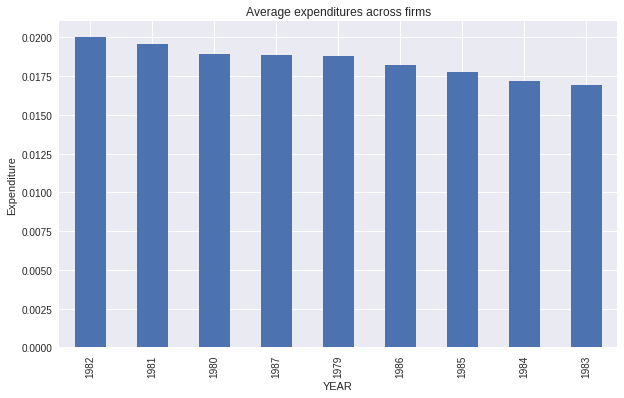

In [11]:
matplotlib.style.use('seaborn')

x = data.pivot_table(values='EXPEND', index='ID',columns=['YEAR'])
plt.figure(figsize=(10,6))
plt.title('Average expenditures across firms')
plt.xlabel('Firms')
plt.ylabel('Expenditure')
x.mean().sort_values(ascending=False).plot(kind='bar')
plt.show()


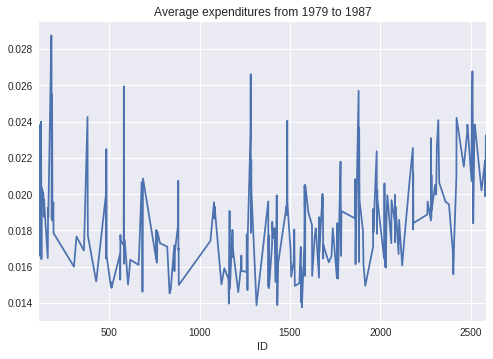

In [12]:
data.pivot_table(values='EXPEND', index='YEAR',columns=['ID']).mean().plot()
plt.title('Average expenditures from 1979 to 1987')
plt.show()

# Prepare data for panel regression

In [13]:
data.columns

Index(['ID', 'YEAR', 'EXPEND', 'REVENUE', 'GRANTS '], dtype='object')

In [0]:
data.rename(columns={'GRANTS ':'GRANTS'}, inplace=True)

__Correlation analysis__<br>
Multicollinearity occurs when independent variables in a regression model are correlated.

In [15]:
data[['YEAR','EXPEND','REVENUE','GRANTS']].corr()

,YEAR,EXPEND,REVENUE,GRANTS
YEAR,1.000000,-0.113153,-0.237267,0.155928
EXPEND,-0.113153,1.000000,0.875631,0.348488
REVENUE,-0.237267,0.875631,1.000000,-0.054213
GRANTS,0.155928,0.348488,-0.054213,1.000000


In [0]:
YEAR = pd.Categorical(data.YEAR)

In [0]:
data.set_index(['ID','YEAR'], inplace=True)
data['year']=YEAR

In [18]:
data.head()

EXPEND   REVENUE    GRANTS  year
ID  YEAR                                    
114 1979  0.022974  0.018177  0.005443  1979
    1980  0.026631  0.020914  0.005730  1980
    1981  0.027325  0.021084  0.005665  1981
    1982  0.028870  0.023431  0.005886  1982
    1983  0.022647  0.017998  0.005591  1983

# Basic pooled OLS regression on panel data

- modeling expenditures using all of the variables and time dummies
- year variable is categorical which facilitates (makes it easier) making dummies.

In [19]:
from linearmodels.panel import PooledOLS
import statsmodels.api as sm
variables = ['REVENUE','GRANTS','year']
IVs = sm.add_constant(data[variables])
mod = PooledOLS(data.EXPEND, IVs)
pooled_res = mod.fit()
print(pooled_res)


                          PooledOLS Estimation Summary                          
Dep. Variable:                 EXPEND   R-squared:                        0.9262
Estimator:                  PooledOLS   R-squared (Between):              0.9907
No. Observations:                2385   R-squared (Within):               0.7139
Date:                Thu, Dec 05 2019   R-squared (Overall):              0.9262
Time:                        22:22:58   Log-likelihood                 1.344e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2977.4
Entities:                         265   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                 F(10,2374)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             2977.4
                            

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Estimating models with uncorrelated effects 
When modeling panel data it is common to consider models beyond what OLS will efficiently estimate. The most common are error component models which add an additional term to the standard OLS model,

yit=xitβ+αi+ϵit

where αi affects all values of entity i. When the αi are uncorrelated with the regressors in xit, a random effects model can be used to efficiently estimate parameters of this model.

##Random effects model
The random effects model is virtually identical to the pooled OLS model except that is accounts for the structure of the model and so is more efficient. Random effects uses a quasi-demeaning strategy which subtracts the time average fo the within entity values to account for the common shock.

In [20]:
from linearmodels.panel import RandomEffects
mod = RandomEffects(data.EXPEND, IVs)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                 EXPEND   R-squared:                        0.9262
Estimator:              RandomEffects   R-squared (Between):              0.9907
No. Observations:                2385   R-squared (Within):               0.7139
Date:                Thu, Dec 05 2019   R-squared (Overall):              0.9262
Time:                        22:22:58   Log-likelihood                 1.344e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2977.4
Entities:                         265   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                 F(10,2374)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             2977.4
                            

- including year dummies will fit the trend in experience and only the cross-sectional differences matter
- the quasi-differencing in the random effects estimator depends on a quantity that depends on the relative variance of the idiosyncratic shock and the common shock. This can be accessed using variance_decomposition.

In [21]:
re_res.variance_decomposition

Effects                   0.000000e+00
Residual                  6.830175e-07
Percent due to Effects    0.000000e+00
Name: Variance Decomposition, dtype: float64

The coefficient θi determines how much demeaning takes place. When this value is 1, the RE model reduces to the pooled model since this occurs when there is no variance in the effects. When panels are unbalanced it will vary across entities, but in this balanced panel all values are the same.

In [22]:
re_res.theta.head()


,theta
ID,
114,0.0
115,0.0
120,0.0
123,0.0
125,0.0


## The between estimator
The between estimator is an alternative, usually less efficient estimator, can can be used to estimate model parameters. It is particular simple since it first computes the time averages of y and x and then runs a simple regression using these averages.

The year dummies are dropped since the averaging removes differences due to the year.

In [23]:
from linearmodels.panel import BetweenOLS
variables = ['REVENUE','GRANTS']
IVs = sm.add_constant(data[variables])
mod = BetweenOLS(data.EXPEND, IVs)
be_res = mod.fit()
print(be_res)


                         BetweenOLS Estimation Summary                          
Dep. Variable:                 EXPEND   R-squared:                        0.9925
Estimator:                 BetweenOLS   R-squared (Between):              0.9925
No. Observations:                 265   R-squared (Within):               0.6870
Date:                Thu, Dec 05 2019   R-squared (Overall):              0.9212
Time:                        22:22:58   Log-likelihood                    1831.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   1.731e+04
Entities:                         265   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                   F(2,262)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):          1.731e+04
                            

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Handling correlated effects 
(Effects and regressor correlate => RE and BE not consistent)


## Including fixed effects

### Time invariant variables
Remove time invariant and collinear variables

In [24]:
from linearmodels.panel import PanelOLS
variables = ['GRANTS','REVENUE', 'year']
IVs = sm.add_constant(data[variables])
mod = PanelOLS(data.EXPEND, IVs, entity_effects=True)
fe_res = mod.fit()
print(fe_res)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                          PanelOLS Estimation Summary                           
Dep. Variable:                 EXPEND   R-squared:                        0.7427
Estimator:                   PanelOLS   R-squared (Between):              0.9276
No. Observations:                2385   R-squared (Within):               0.7427
Date:                Thu, Dec 05 2019   R-squared (Overall):              0.8845
Time:                        22:22:58   Log-likelihood                 1.369e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      609.14
Entities:                         265   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                 F(10,2110)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             609.14
                            

## Time Effects

### Effects vs dummies
compare time dummies with time effects model

In [25]:
from linearmodels.panel import PanelOLS
variables = ['GRANTS','REVENUE']
IVs = sm.add_constant(data[variables])
mod = PanelOLS(data.EXPEND, IVs, entity_effects=True, time_effects=True, drop_absorbed=True)
fe_te_res = mod.fit()
print(fe_te_res)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                          PanelOLS Estimation Summary                           
Dep. Variable:                 EXPEND   R-squared:                        0.5630
Estimator:                   PanelOLS   R-squared (Between):              0.9276
No. Observations:                2385   R-squared (Within):               0.7196
Date:                Thu, Dec 05 2019   R-squared (Overall):              0.8791
Time:                        22:22:59   Log-likelihood                 1.369e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1359.0
Entities:                         265   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                  F(2,2110)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             1359.0
                            

## Using first differences
- exclude time invariant variables
- Additionally, only one linear time-trending variable can be included since this will look like a constant. This variable will soak up all time-trends in the data, and so interpretations of these variable can be challenging.

In [26]:

from linearmodels.panel import FirstDifferenceOLS
variables = ['GRANTS','REVENUE']
IVs = data[variables]
mod = FirstDifferenceOLS(data.EXPEND, IVs)
fd_res = mod.fit()
print(fd_res)

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:                 EXPEND   R-squared:                        0.5934
Estimator:         FirstDifferenceOLS   R-squared (Between):              0.9159
No. Observations:                2120   R-squared (Within):               0.7162
Date:                Thu, Dec 05 2019   R-squared (Overall):              0.9146
Time:                        22:22:59   Log-likelihood                  1.14e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1545.6
Entities:                         265   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                  F(2,2118)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             1545.6
                            

# Comparing models
First compare models with correlated effects

In [0]:
from linearmodels.panel import compare
C1 = compare({'TimeDummies':fe_res,'TimeEffects':fe_te_res,'FirstDiff':fd_res})

In [28]:
C1

,FirstDiff,TimeDummies,TimeEffects
Dep. Variable,EXPEND,EXPEND,EXPEND
Estimator,FirstDifferenceOLS,PanelOLS,PanelOLS
No. Observations,2120,2385,2385
Cov. Est.,Unadjusted,Unadjusted,Unadjusted
R-squared,0.5934,0.7427,0.5630
R-Squared (Within),0.7162,0.7427,0.7196
R-Squared (Between),0.9159,0.9276,0.9276
R-Squared (Overall),0.9146,0.8845,0.8791
F-statistic,1545.6,609.14,1359.0
P-value (F-stat),0.0000,0.0000,0.0000


Compare models with uncorrelated effects

In [29]:
C2 = compare({'RE':re_res,'BE':be_res})
C2

,BE,RE
Dep. Variable,EXPEND,EXPEND
Estimator,BetweenOLS,RandomEffects
No. Observations,265,2385
Cov. Est.,Unadjusted,Unadjusted
R-squared,0.9925,0.9262
R-Squared (Within),0.6870,0.7139
R-Squared (Between),0.9925,0.9907
R-Squared (Overall),0.9212,0.9262
F-statistic,1.731e+04,2977.4
P-value (F-stat),0.0000,0.0000


Then compare basic model, best random effects model and best fixed effects model

In [30]:
C3 = compare({'Pooled':pooled_res,'RE':re_res,'TimeDummies': fe_res, 'FirstDiff': fd_res})
C3

,FirstDiff,Pooled,RE,TimeDummies
Dep. Variable,EXPEND,EXPEND,EXPEND,EXPEND
Estimator,FirstDifferenceOLS,PooledOLS,RandomEffects,PanelOLS
No. Observations,2120,2385,2385,2385
Cov. Est.,Unadjusted,Unadjusted,Unadjusted,Unadjusted
R-squared,0.5934,0.9262,0.9262,0.7427
R-Squared (Within),0.7162,0.7139,0.7139,0.7427
R-Squared (Between),0.9159,0.9907,0.9907,0.9276
R-Squared (Overall),0.9146,0.9262,0.9262,0.8845
F-statistic,1545.6,2977.4,2977.4,609.14
P-value (F-stat),0.0000,0.0000,0.0000,0.0000


## Hausman Test

In [31]:
import numpy as np
import numpy.linalg as la
from scipy import stats
fe = fe_res.params.to_numpy()
re = re_res.params.to_numpy()
fe_cov = fe_res.cov.to_numpy()
re_cov = re_res.cov.to_numpy()
chi2 = np.dot((fe - re).T, la.inv(fe_cov - re_cov).dot(fe - re))
deg_f = fe[np.abs(fe) < 1e8].size
pval = stats.chi2.sf(chi2, deg_f)
print("Chi^2 Value: ", chi2)
print("Degrees of Freedom: ", deg_f)
print("P Value: ", pval)
# Chi^2 Cutoff for 11 Degrees of Freedom is 19.68, also the P Value Cutoff is 0.05, 
# so the hypothesis for RE does not hold and FE is preferrable

Chi^2 Value:  290.5532742057929
Degrees of Freedom:  11
P Value:  8.54575416464869e-56


# Covariance options

## Heteroskedasticity robust covariance
White’s robust covariance can be used by setting cov_type='robust. This estimator adds some robustness against certain types of specification issues but should not be used when using fixed effects (entity effects) since it is no longer robust. Instead a clustered covariance is required.

In [32]:
variables = ['GRANTS','REVENUE']
IVs = sm.add_constant(data[variables])
mod = PooledOLS(data.EXPEND, IVs)
robust = mod.fit(cov_type='robust')



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [33]:
robust

Dep. Variable:,EXPEND,R-squared:,0.9240
Estimator:,PooledOLS,R-squared (Between):,0.9900
No. Observations:,2385,R-squared (Within):,0.7068
Date:,"Thu, Dec 05 2019",R-squared (Overall):,0.9240
Time:,22:22:59,Log-likelihood,1.341e+04
Cov. Estimator:,Robust,,
,,F-statistic:,1.447e+04
Entities:,265,P-value,0.0000
Avg Obs:,9.0000,Distribution:,"F(2,2382)"
Min Obs:,9.0000,,
Max Obs:,9.0000,F-statistic (robust):,7749.2


## Clustered by entity
The usual variable to cluster are entity or entity and time. This can be implemented using cov_type='clustered' and the additional keyword arguments cluster_entity=True and/or cluster_time=True.
<br>First cluster only by entity

In [0]:
clust_entity = mod.fit(cov_type='clustered', cluster_entity=True)


cluster both

In [0]:
clust_entity_time = mod.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)


In [36]:
from collections import OrderedDict
res = OrderedDict()
res['Robust'] = robust
res['Entity'] = clust_entity
res['Entity-Time'] = clust_entity_time
print(compare(res))

                     Model Comparison                    
                           Robust      Entity Entity-Time
---------------------------------------------------------
Dep. Variable              EXPEND      EXPEND      EXPEND
Estimator               PooledOLS   PooledOLS   PooledOLS
No. Observations             2385        2385        2385
Cov. Est.                  Robust   Clustered   Clustered
R-squared                  0.9240      0.9240      0.9240
R-Squared (Within)         0.7068      0.7068      0.7068
R-Squared (Between)        0.9900      0.9900      0.9900
R-Squared (Overall)        0.9240      0.9240      0.9240
F-statistic             1.447e+04   1.447e+04   1.447e+04
P-value (F-stat)           0.0000      0.0000      0.0000
===================== =========== =========== ===========
const                      0.0005      0.0005      0.0005
                         (3.3793)    (3.5708)    (3.1247)
GRANTS                     0.9997      0.9997      0.9997
              

Clustering on entity reduced the t-stats across the board. This suggests there is important correlation in the residuals per entity. Clustering by both also decreases the t-stats which suggests that there is cross-sectional dependence in the data. Note: clustering by entity addresses correlation across time and clustering by time controls for correlation between entities in a time period.

## Other clusters

Other clusters can be used by directly passing integer arrays (1 or 2 columns, or a 1-d array) using the input clusters. This example clustered by occupation, which is probably not a reliable variable to cluster on since there are only 9 groups and the usual theory for clustered standard errors requires that the number of clusters is large.

In [37]:
clust_entity = mod.fit(cov_type='clustered', clusters=data.GRANTS)
print(data.GRANTS.value_counts())
print(clust_entity)

0.005393    3
0.005490    3
0.004985    3
0.004626    2
0.004644    2
           ..
0.005645    1
0.003915    1
0.005084    1
0.004790    1
0.005208    1
Name: GRANTS, Length: 2289, dtype: int64
                          PooledOLS Estimation Summary                          
Dep. Variable:                 EXPEND   R-squared:                        0.9240
Estimator:                  PooledOLS   R-squared (Between):              0.9900
No. Observations:                2385   R-squared (Within):               0.7068
Date:                Thu, Dec 05 2019   R-squared (Overall):              0.9240
Time:                        22:22:59   Log-likelihood                 1.341e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   1.447e+04
Entities:                         265   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                  F(2,2